Here we are going to build a TRB model in python. All data comes from open rocket file with TRB and thrust curves from the onedrive and the technical report for far-out 2025. The task won't be easy, that's what I assume, nevertheless it is the opportunity to learn a lot about rocket science. Let's begin by some time estimations of the work that is to be done. 

In [2]:
from rocketpy import Environment, LiquidMotor, Rocket, Flight

In [3]:
env = Environment(latitude=35.35, longitude=117.81, elevation=609.6)

In [4]:
import datetime

today = datetime.date.today()

env.set_date(
    (today.year, today.month, today.day, 12)
)  # Hour given in UTC time

In [5]:
env.set_atmospheric_model(type="Forecast", file="GFS")


Gravity Details

Acceleration of gravity at surface level:    9.7970 m/s²
Acceleration of gravity at  78.604 km (ASL): 9.5595 m/s²


Launch Site Details

Launch Date: 2025-12-14 12:00:00 UTC
Launch Site Latitude: 35.35000°
Launch Site Longitude: 117.81000°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 573598.55 E    3912158.86 N
Launch Site UTM zone: 50S
Launch Site Surface Elevation: 216.9 m


Atmospheric Model Details

Atmospheric Model Type: Forecast
Forecast Maximum Height: 78.604 km
Forecast Time Period: from 2025-12-14 12:00:00 to 2025-12-30 12:00:00 utc
Forecast Hour Interval: 3 hrs
Forecast Latitude Range: From -90.0° to 90.0°
Forecast Longitude Range: From 0.0° to 359.75°

Surface Atmospheric Conditions

Surface Wind Speed: 0.95 m/s
Surface Wind Direction: 222.40°
Surface Wind Heading: 42.40°
Surface Pressure: 998.20 hPa
Surface Temperature: 274.84 K
Surface Air Density: 1.265 kg/m³
Surface Speed of Sound: 332.34 m/s


Earth Model Details

Earth Radius at Launch si

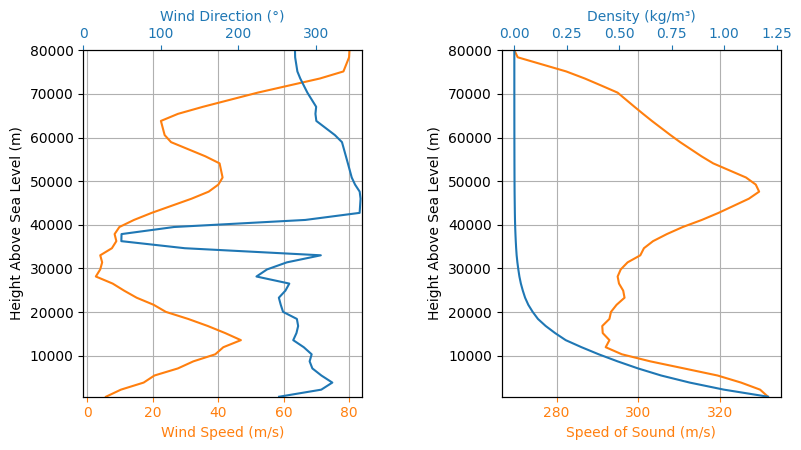

In [6]:
env.info()

In [7]:
from rocketpy import Fluid, LiquidMotor, CylindricalTank, MassFlowRateBasedTank

In [19]:
# Define fluids
oxidizer_liq = Fluid(name="N2O_l", density=1220)
oxidizer_gas = Fluid(name="N2O_g", density=1.9277)
fuel_liq = Fluid(name="ethanol_l", density=789)
fuel_gas = Fluid(name="ethanol_g", density=1.59)

# Define tanks geometry
tanks_shape = CylindricalTank(radius = 0.1, height = 0.67, spherical_caps = True)

# Define tanks
oxidizer_tank = MassFlowRateBasedTank(
    name="oxidizer tank",
    geometry=tanks_shape,
    flux_time=10.5,
    initial_liquid_mass=15.24,
    initial_gas_mass=0.01,
    liquid_mass_flow_rate_in=0,
    liquid_mass_flow_rate_out=1.4514,
    gas_mass_flow_rate_in=0,
    gas_mass_flow_rate_out=0,
    liquid=oxidizer_liq,
    gas=oxidizer_gas,
)

fuel_tank = MassFlowRateBasedTank(
    name="fuel tank",
    geometry=tanks_shape,
    flux_time=10.5,
    initial_liquid_mass=4.76,
    initial_gas_mass=0.01,
    liquid_mass_flow_rate_in=0,
    liquid_mass_flow_rate_out=0.33,
    gas_mass_flow_rate_in=0,
    gas_mass_flow_rate_out=0,
    liquid=fuel_liq,
    gas=fuel_gas,
)

In [23]:
z4000 = LiquidMotor(
    thrust_source="C:\\Users\\krikb\\Desktop\\simulations\\AGH-SS_Z4000-10sBurn-optimal.eng",
    dry_mass=8.7,
    dry_inertia=(0.7, 0.7, 0.0435),
    nozzle_radius=0.0362,
    center_of_dry_mass_position=1.75,
    nozzle_position=0,
    burn_time=10.5,
    coordinate_system_orientation="nozzle_to_combustion_chamber",
)
z4000.add_tank(tank=oxidizer_tank, position=1.065)
z4000.add_tank(tank=fuel_tank, position=1.735)

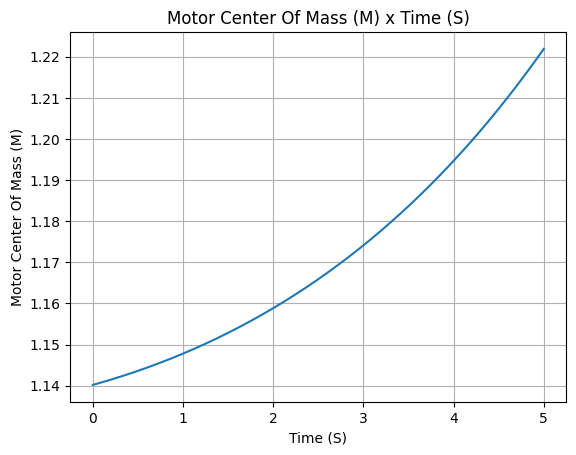

In [14]:
z4000.center_of_mass.plot(0, 5)

Nozzle Details
Nozzle Radius: 0.0362 m

Motor Details
Total Burning Time: 10.5 s
Total Propellant Mass: 20.020 kg
Structural Mass Ratio: 0.303
Average Propellant Exhaust Velocity: 1395.204 m/s
Average Thrust: 2780.392 N
Maximum Thrust: 4575.401 N at 1.089 s after ignition.
Total Impulse: 29194.116 Ns



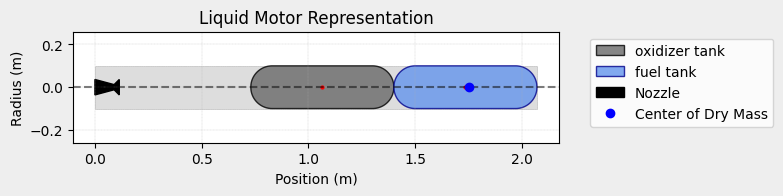

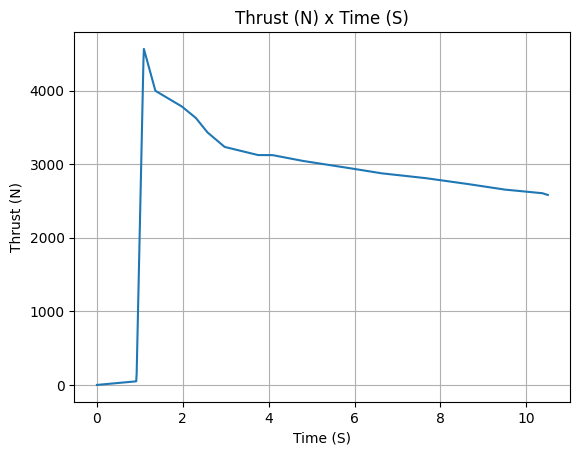

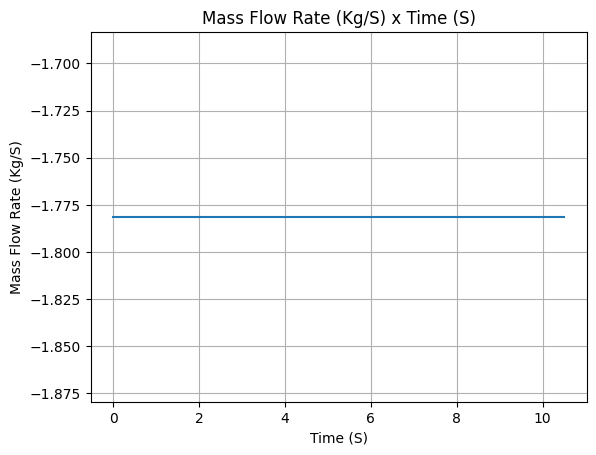

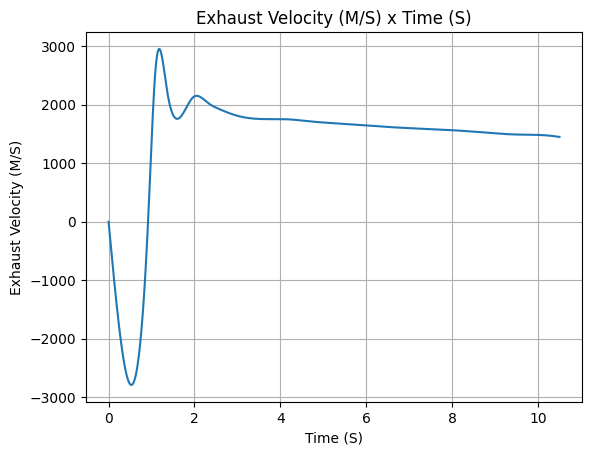

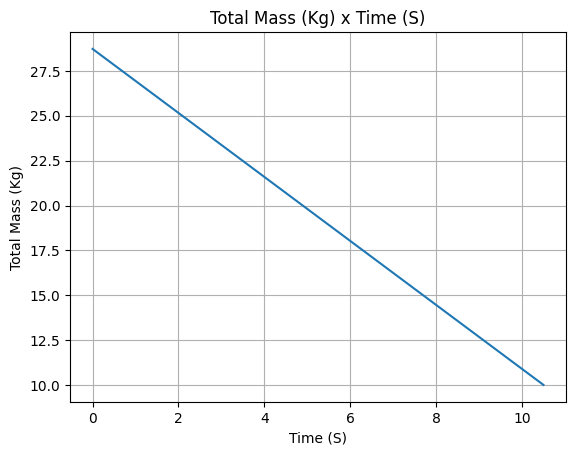

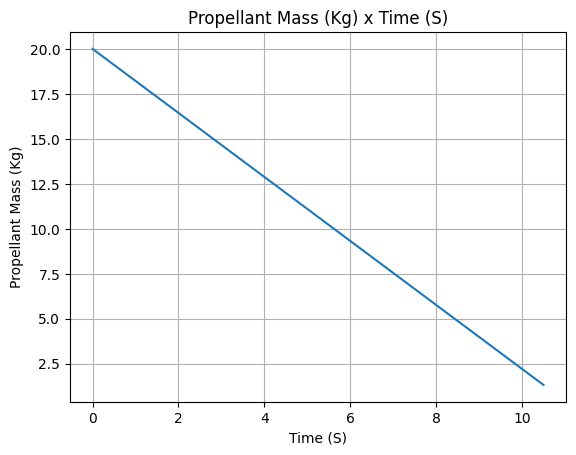

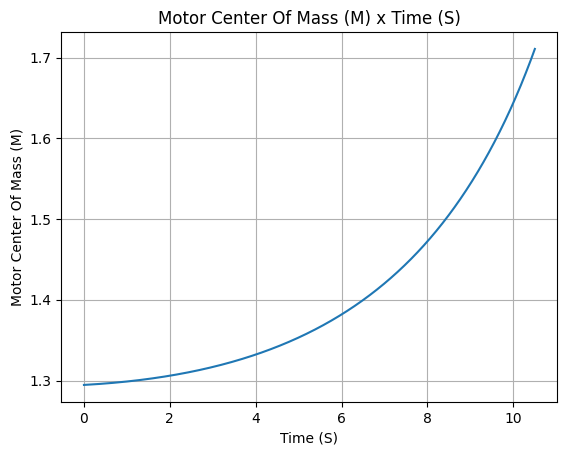

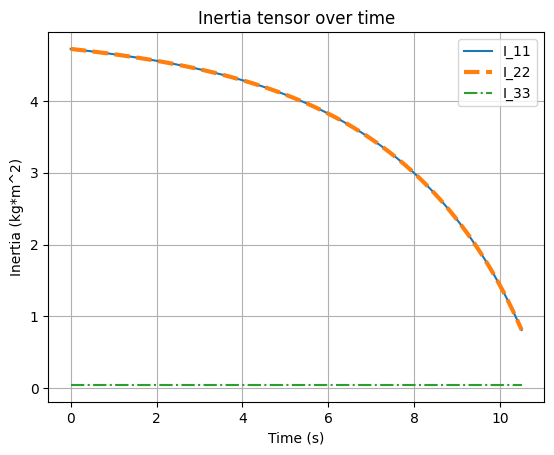

In [24]:
z4000.all_info()

Nozzle Details
Nozzle Radius: 0.072 m

Motor Details
Total Burning Time: 10.5 s
Total Propellant Mass: 20.020 kg
Structural Mass Ratio: 0.303
Average Propellant Exhaust Velocity: 1395.204 m/s
Average Thrust: 2780.392 N
Maximum Thrust: 4575.401 N at 1.089 s after ignition.
Total Impulse: 29194.116 Ns



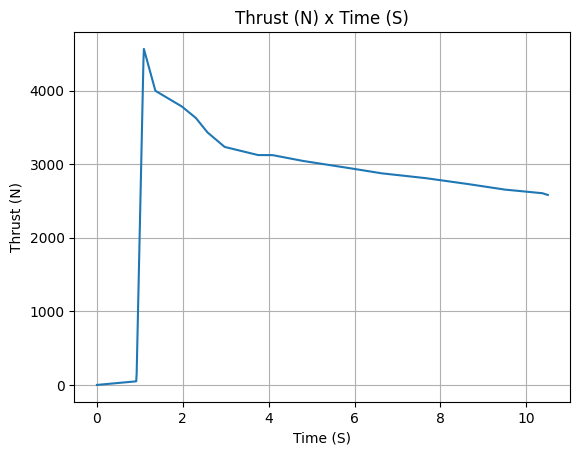

In [11]:
z4000.info()